<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/S%C3%A9ance_1_(intro_Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séance 1 / Introduction à Pandas

Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles.

https://pandas.pydata.org/
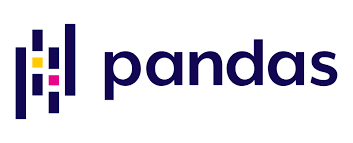

## Configuration de l'environnement de travail (Google Colab)

https://colab.research.google.com/notebooks/intro.ipynb




In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install geopandas

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import os
import numpy as np
import shapely

## Téléchargement des données

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O Espacesverts.csv https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B

--2023-03-09 19:59:18--  https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘Espacesverts.csv’

Espacesverts.csv        [      <=>           ]  10.05M  6.62MB/s    in 1.5s    

2023-03-09 19:59:20 (6.62 MB/s) - ‘Espacesverts.csv’ saved [10541056]



## Exploration du jeux de données des espaces verts


https://studylib.net/doc/25268801/pandas-cheat-sheet


In [ ]:
#Importer CSV to dataframe

Espacesverts = pd.read_csv("Espacesverts.csv", sep=';')
Espacesverts.head()

,nsq_espace_vert,nom_ev,type_ev,categorie,adresse_numero,adresse_complement,adresse_typevoie,adresse_libellevoie,adresse_codepostal,poly_area,...,ouvert_ferme,id_division,id_atelier_horticole,ida3d_enb,site_villes,id_eqpt,competence,geom,url_plan,geom_x_y
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Décorations sur la voie publique,Jardiniere,29.0,NaN,RUE DES,LILAS,75019,46.0,...,NaN,119,43.0,JDE7538,SV,7538,CA,"{""coordinates"": [[[2.3962589173753317, 48.8795...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs végétalisés,Murs vegetalises,28.0,NaN,RUE DES,DAMES,75017,2.0,...,NaN,117,36.0,JDE9426,SV,9426,CA,"{""coordinates"": [[[2.3240063572037286, 48.8844...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Promenades ouvertes,Square,1.0,NaN,VOIE,CV/15,75015,4997.0,...,Non,115,26.0,56551,1272,3650,CA,"{""coordinates"": [[[2.2952346225701628, 48.8517...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
3,151,SQUARE LOUIS MAJORELLE,Promenades ouvertes,Square,28.0,B,RUE DE LA,FORGE ROYALE,75011,2053.0,...,Non,111,11.0,48547,318,3635,CA,"{""coordinates"": [[[2.3808589008893586, 48.8519...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Décorations sur la voie publique,Jardiniere,1.0,NaN,AVENUE DU,BEL AIR,75012,165.0,...,NaN,111,16.0,JDE7267,SV,7267,CA,"{""coordinates"": [[[[2.396712325019227, 48.8473...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN


In [ ]:
#Checker les types de champs

Espacesverts.dtypes

nsq_espace_vert            int64
nom_ev                    object
type_ev                   object
categorie                 object
adresse_numero           float64
adresse_complement        object
adresse_typevoie          object
adresse_libellevoie       object
adresse_codepostal         int64
poly_area                float64
surface_totale_reelle    float64
surface_horticole        float64
presence_cloture          object
perimeter                float64
annee_ouverture          float64
annee_renovation         float64
ancien_nom_ev             object
annee_changement_nom     float64
nb_entites               float64
ouvert_ferme              object
id_division                int64
id_atelier_horticole     float64
ida3d_enb                 object
site_villes               object
id_eqpt                   object
competence                object
geom                      object
url_plan                  object
geom_x_y                 float64
dtype: object

In [ ]:
#Compter le nombre d'enregistrements

Espacesverts['nsq_espace_vert'].size

2242

In [ ]:
#Réorganiser la table (sélection des colonnes importantes)

EspacesvertsOk = Espacesverts[["nsq_espace_vert", "nom_ev", "categorie", "adresse_codepostal", "surface_totale_reelle", "annee_ouverture"]]
EspacesvertsOk.head()

,nsq_espace_vert,nom_ev,categorie,adresse_codepostal,surface_totale_reelle,annee_ouverture
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Jardiniere,75019,50.0,2003.0
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs vegetalises,75017,NaN,2009.0
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Square,75015,7540.0,1998.0
3,151,SQUARE LOUIS MAJORELLE,Square,75011,2000.0,1993.0
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Jardiniere,75012,108.0,NaN


In [ ]:
# Renommer les noms des champs

EspacesvertsOk.rename(columns={'nsq_espace_vert': 'id','nom_ev': 'nom','adresse_codepostal': 'CodePostal', 'surface_totale_reelle' : 'surface', 'annee_ouverture': 'ouverture'}, inplace=True)
EspacesvertsOk.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,nom,categorie,CodePostal,surface,ouverture
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Jardiniere,75019,50.0,2003.0
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs vegetalises,75017,NaN,2009.0
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Square,75015,7540.0,1998.0
3,151,SQUARE LOUIS MAJORELLE,Square,75011,2000.0,1993.0
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Jardiniere,75012,108.0,NaN


In [ ]:
#Changer le type d'une colonne
EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)
EspacesvertsOk.dtypes

<ipython-input-7-77d0c1e8b396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)


id             object
nom            object
categorie      object
CodePostal      int64
surface       float64
ouverture     float64
dtype: object

In [ ]:
# Concaténer des champs
EspacesvertsOk["concat"] = EspacesvertsOk["categorie"] + " - " + EspacesvertsOk["nom"]
EspacesvertsOk.head()

<ipython-input-8-b20301b15a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk["concat"] = EspacesvertsOk["categorie"] + " - " + EspacesvertsOk["nom"]


,id,nom,categorie,CodePostal,surface,ouverture,concat
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Jardiniere,75019,50.0,2003.0,Jardiniere - JARDINIERE ANGLE DES RUES DE BELL...
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs vegetalises,75017,NaN,2009.0,Murs vegetalises - JARDINIERE VERTICALE DU 28 ...
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Square,75015,7540.0,1998.0,Square - SQUARE NICOLE DE HAUTECLOCQUE
3,151,SQUARE LOUIS MAJORELLE,Square,75011,2000.0,1993.0,Square - SQUARE LOUIS MAJORELLE
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Jardiniere,75012,108.0,NaN,Jardiniere - JARDINIERES DE L'AVENUE DU BEL AIR


In [ ]:
#Diviser un champ
EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
EspacesvertsOk['Arrondissement'] = EspacesvertsOk['CodePostal'].str[-2:]
EspacesvertsOk.head()

<ipython-input-9-798e748c9877>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
<ipython-input-9-798e748c9877>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['Arrondissement'] = EspacesvertsOk['CodePostal'].str[-2:]


,id,nom,categorie,CodePostal,surface,ouverture,concat,Arrondissement
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Jardiniere,75019,50.0,2003.0,Jardiniere - JARDINIERE ANGLE DES RUES DE BELL...,19
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs vegetalises,75017,NaN,2009.0,Murs vegetalises - JARDINIERE VERTICALE DU 28 ...,17
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Square,75015,7540.0,1998.0,Square - SQUARE NICOLE DE HAUTECLOCQUE,15
3,151,SQUARE LOUIS MAJORELLE,Square,75011,2000.0,1993.0,Square - SQUARE LOUIS MAJORELLE,11
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Jardiniere,75012,108.0,NaN,Jardiniere - JARDINIERES DE L'AVENUE DU BEL AIR,12


In [ ]:
# Filtrer les données

# Selectioner selon une modalité d'une variable
Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]

# Sélectionner selon deux modalité d'une variable (OR)
Squaresetjardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin') | (EspacesvertsOk["categorie"] == 'Square')]

# Selectioner selon une valeur numérique
Grandespacesverts = EspacesvertsOk[(EspacesvertsOk["surface"] >10000)]

#Sélectionner selon les modalités de deux variables (AND)
Squares15eme = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == 75015) & (EspacesvertsOk["categorie"] == 'Square')]

# Sélectioner toute les modalités sauf une
Toussaufjardins = EspacesvertsOk[~(EspacesvertsOk["categorie"] == 'Jardin')]

In [ ]:
#Compter le nombre d'enregistrement des sélections

Jardins['id'].size

203

In [ ]:
#Sélectionner selon les modalités de deux variables (AND)
Squares15eme = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == '15') & (EspacesvertsOk["categorie"] == 'Square')]
Squares15eme.head()

,id,nom,categorie,CodePostal,surface,ouverture,concat,Arrondissement
21,11967,SQUARE DE L'HOPITAL NECKER,Square,75015,10000.0,2020.0,Square - SQUARE DE L'HOPITAL NECKER,15
124,349,SQUARE CLOS FEUQUIERES - DESNOUETTES,Square,75015,14500.0,1972.0,Square - SQUARE CLOS FEUQUIERES - DESNOUETTES,15
400,359,SQUARE PABLO CASALS,Square,75015,5898.0,1979.0,Square - SQUARE PABLO CASALS,15
402,333,SQUARE JEAN CHERIOUX,Square,75015,3980.0,1896.0,Square - SQUARE JEAN CHERIOUX,15
592,347,SQUARE DE L'OISEAU LUNAIRE,Square,75015,4200.0,1969.0,Square - SQUARE DE L'OISEAU LUNAIRE,15


,id
categorie,
Arboretum,1
Terre-plein,1
Archipel,1
Bois,2
Ile,2


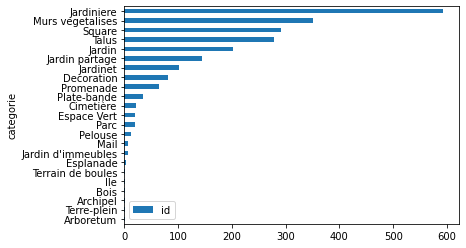

In [ ]:
# Regrouper les espaces verts par catégorie avec comptage (GROUP BY)

Categorie = EspacesvertsOk[["categorie", "id"]].groupby("categorie").count()
Categorie = Categorie.sort_values("id", ascending=True)
Categorie.plot(kind="barh")
Categorie.head()

In [ ]:
# Ne garder que les types principaux

Categorie = Categorie[(Categorie["id"] >10)]
Categorie.head()


,id
categorie,
Pelouse,12
Parc,19
Espace Vert,20
Cimetière,21
Plate-bande,35


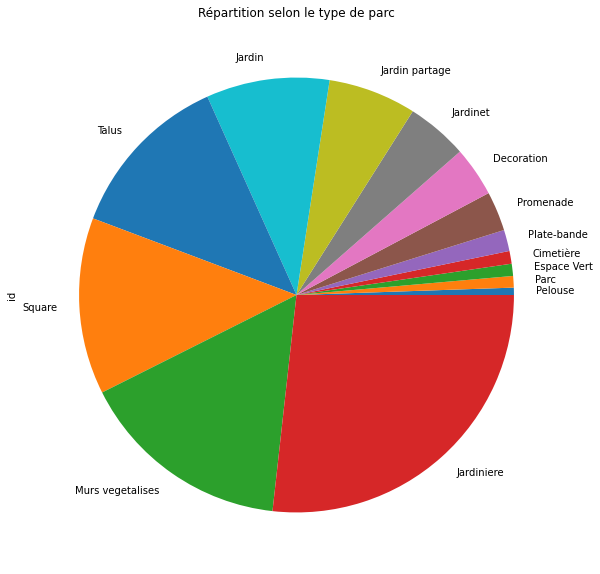

In [ ]:
# Diagramme circulaire des types d'espaces verts

Categorie.plot.pie(y='id', figsize=(10, 10), legend=False)
plt.title('Répartition selon le type de parc')
plt.show()

## Aller plus loin dans les graphiques

Exemples : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Documentation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Gallery :https://www.python-graph-gallery.com/

<AxesSubplot:xlabel='categorie'>

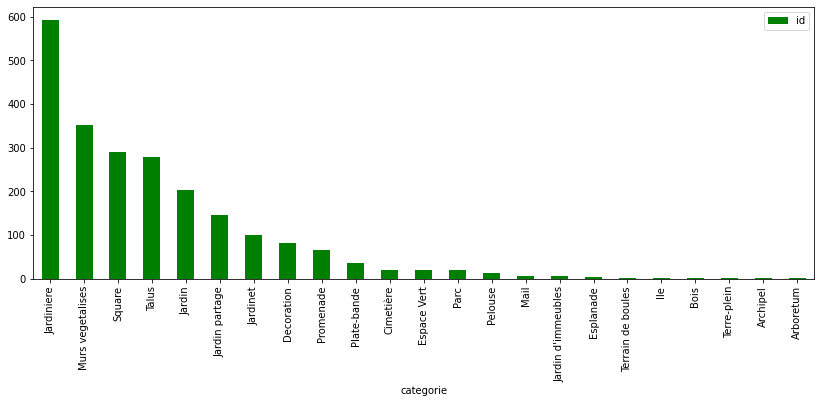

In [ ]:
Categorie = Categorie.sort_values("id", ascending=False)
Categorie.plot(figsize =(14,5), kind="bar", color = "green")


,id
ouverture,
1688.0,1
1791.0,1
1798.0,1
1800.0,1
1804.0,1


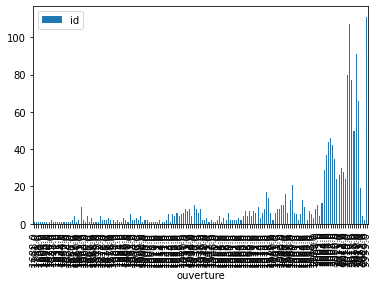

In [ ]:
# Regrouper par année d'ouverture

Anneeouverture = EspacesvertsOk[["ouverture", "id"]].groupby("ouverture").count()
Anneeouverture.plot(kind="bar")
Anneeouverture.head()

<AxesSubplot:xlabel='ouverture'>

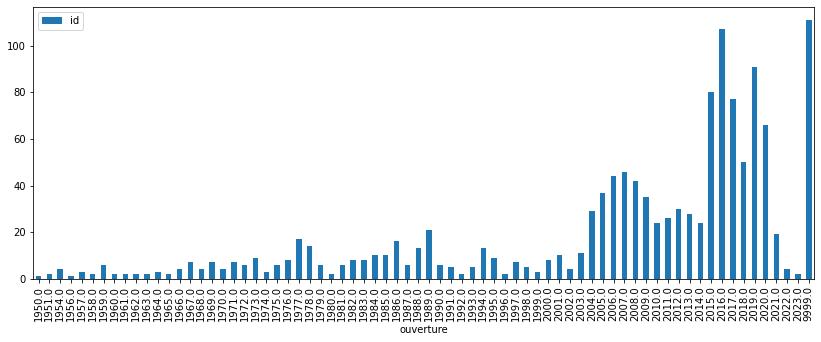

In [ ]:
# Regrouper par année d'ouverture depuis 1950

Espacesverts1950 = EspacesvertsOk[(EspacesvertsOk["ouverture"] >=1950)]
Espacesvertsannee = Espacesverts1950[["ouverture", "id"]].groupby("ouverture").count()
Espacesvertsannee.plot(figsize =(14,5), kind="bar")

,id
Arrondissement,
00,6
01,15
02,26
03,39
04,63


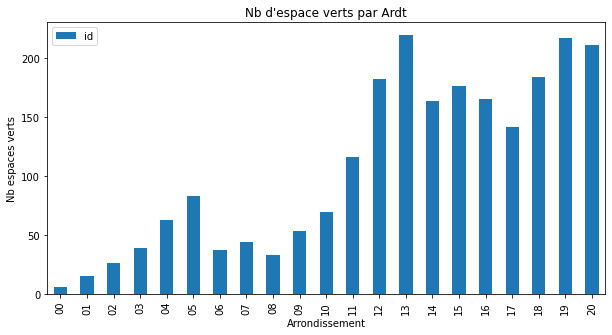

In [ ]:
#Compter le nombre d'espaces vert par arrondissement

EspacevertARDT = EspacesvertsOk[["Arrondissement", "id"]].groupby("Arrondissement").count()
EspacevertARDT.plot(figsize =(10,5), kind="bar")
plt.title("Nb d'espace verts par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb espaces verts")
EspacevertARDT.head()

In [ ]:
#Ne garder que les arrondissement de Paris

EspacevertsParis = EspacesvertsOk[(EspacesvertsOk["CodePostal"].str.contains("75"))]
EspacevertsParis.head()

,id,nom,categorie,CodePostal,surface,ouverture,concat,Arrondissement
0,10906,JARDINIERE ANGLE DES RUES DE BELLEVUE - DES LILAS,Jardiniere,75019,50.0,2003.0,Jardiniere - JARDINIERE ANGLE DES RUES DE BELL...,19
1,11445,JARDINIERE VERTICALE DU 28 RUE DES DAMES,Murs vegetalises,75017,NaN,2009.0,Murs vegetalises - JARDINIERE VERTICALE DU 28 ...,17
2,373,SQUARE NICOLE DE HAUTECLOCQUE,Square,75015,7540.0,1998.0,Square - SQUARE NICOLE DE HAUTECLOCQUE,15
3,151,SQUARE LOUIS MAJORELLE,Square,75011,2000.0,1993.0,Square - SQUARE LOUIS MAJORELLE,11
4,10319,JARDINIERES DE L'AVENUE DU BEL AIR,Jardiniere,75012,108.0,NaN,Jardiniere - JARDINIERES DE L'AVENUE DU BEL AIR,12


,id
Arrondissement,
01,15
02,26
03,39
04,63
05,83


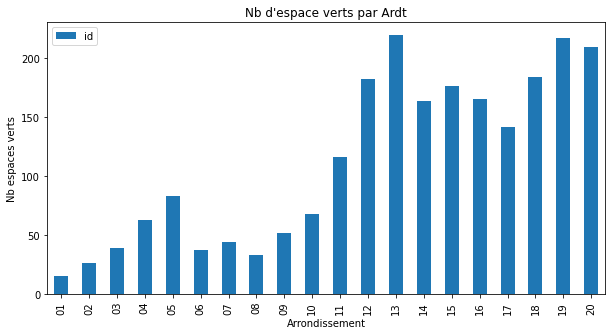

In [ ]:
#Compter le nombre d'espaces vert par arrondissement de Paris

EspacevertsParisardt = EspacevertsParis[["Arrondissement", "id"]].groupby("Arrondissement").count()
EspacevertsParisardt.plot(figsize =(10,5), kind="bar")
plt.title("Nb d'espace verts par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb espaces verts")
EspacevertsParisardt.head()

<AxesSubplot:title={'center':'surface'}, xlabel='categorie'>

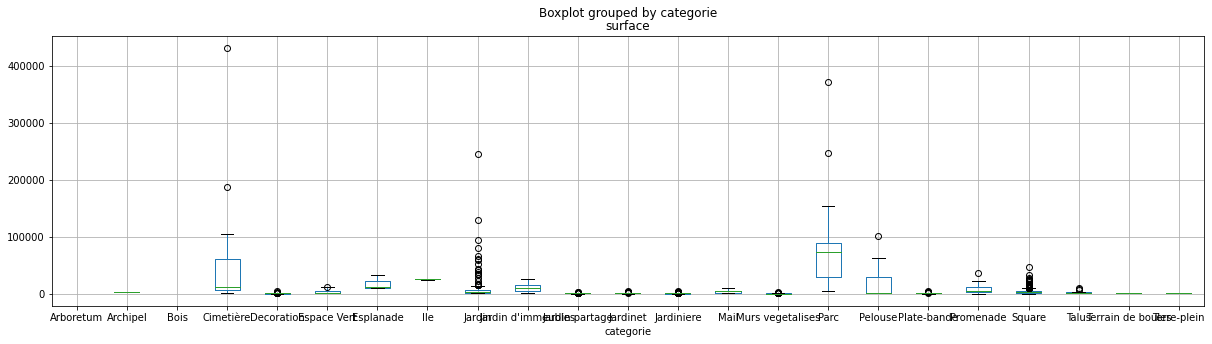

In [ ]:
#Boxplot des surfaces des espaces verts par type

EspacevertsParis.boxplot(figsize =(20,5), column="surface", by="categorie") 

In [ ]:
# Calculer la surface moyenne des squares

Squares = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Square')]
Squares["surface"].mean()

4193.604810996563

In [ ]:
# Calculer la surface moyenne des jardins

Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]
Jardins["surface"].mean()

8805.366834170854

<AxesSubplot:xlabel='categorie'>

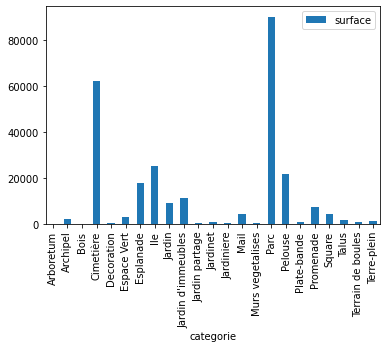

In [ ]:
# Calculer la surface moyenne de chaque type d'espace vert

SurfaceType = EspacevertsParis[["categorie", "surface"]].groupby("categorie").mean()
SurfaceType.head()
SurfaceType.plot(kind="bar")

,surface
Arrondissement,
01,49987.0
02,3485.0
03,28342.0
04,69787.0
05,84278.0


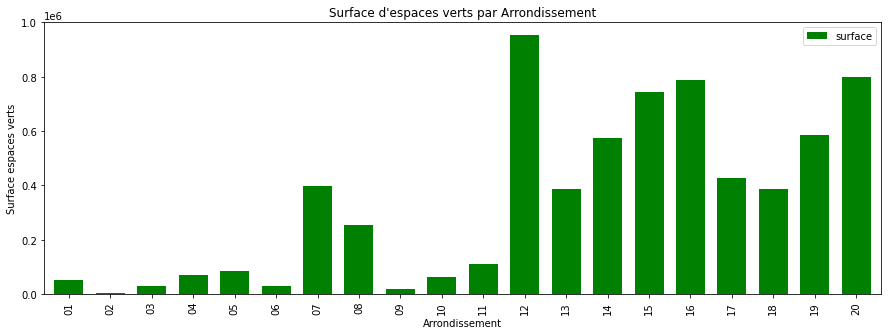

In [ ]:
#Calculer la superficie des espaces vert par arrondissement (agrégation statistique)

SurfaceEspacevertARDT = EspacevertsParis[["Arrondissement", "surface"]].groupby("Arrondissement").sum()
SurfaceEspacevertARDT.plot(figsize =(15,5), kind="bar", color= "green", width=0.7)
plt.title("Surface d'espaces verts par Arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Surface espaces verts")
SurfaceEspacevertARDT.head()

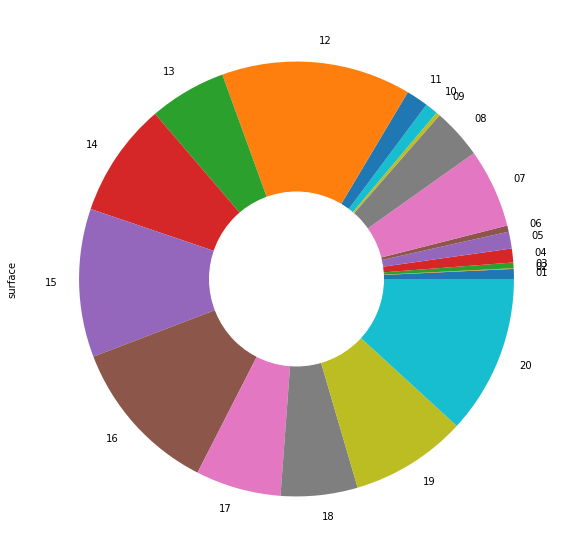

In [ ]:
# Représenter la proportion de chacun des arrondissements

SurfaceEspacevertARDT.plot.pie(y='surface', figsize=(10, 10), legend=False)

my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


In [ ]:
#Verifications

totalsurface = EspacevertsParis['surface'].sum()
print(totalsurface)

totalsurface2 = SurfaceEspacevertARDT['surface'].sum()
print(totalsurface2)

6751842.0
6751842.0


,Nb,Surface
ardt,,
75001,15,49987.0
75002,26,3485.0
75003,38,28212.0
75004,61,68610.0
75005,80,84298.0


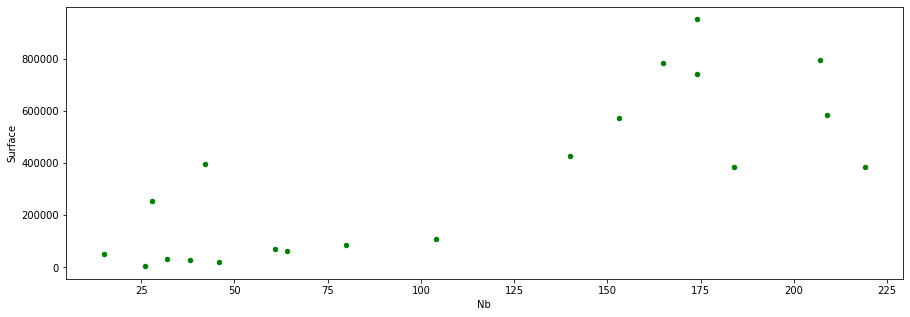

In [ ]:
# Calculer le nombre et la surface moyenne des espaces verts par arrondissement

EspacevertARDT = EspacevertsParis.groupby("ardt").agg(Nb=("id", "count"), Surface=("surface", "sum"))
EspacevertARDT.plot(figsize =(15,5), kind="scatter", x="Nb", y= "Surface", color= "green")
EspacevertARDT.head()

In [ ]:
# Calculer la surface de type d'espaces verts par arrondissement

SurfaceTypeEspacevertARDT = EspacevertsParis[["ardt", "categorie", "surface"]].groupby(["ardt", "categorie"]).sum()
SurfaceTypeEspacevertARDT.head()
SurfaceTypeEspacevertARDT.plot.pie(y='surface', figsize=(10, 10), subplots=True, legend=False)


surface
ardt  categorie                
75001 Decoration           12.0
      Jardin            43170.0
      Jardinet            362.0
      Jardiniere         1363.0
      Murs vegetalises    140.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c7d503d10>,
      dtype=object)

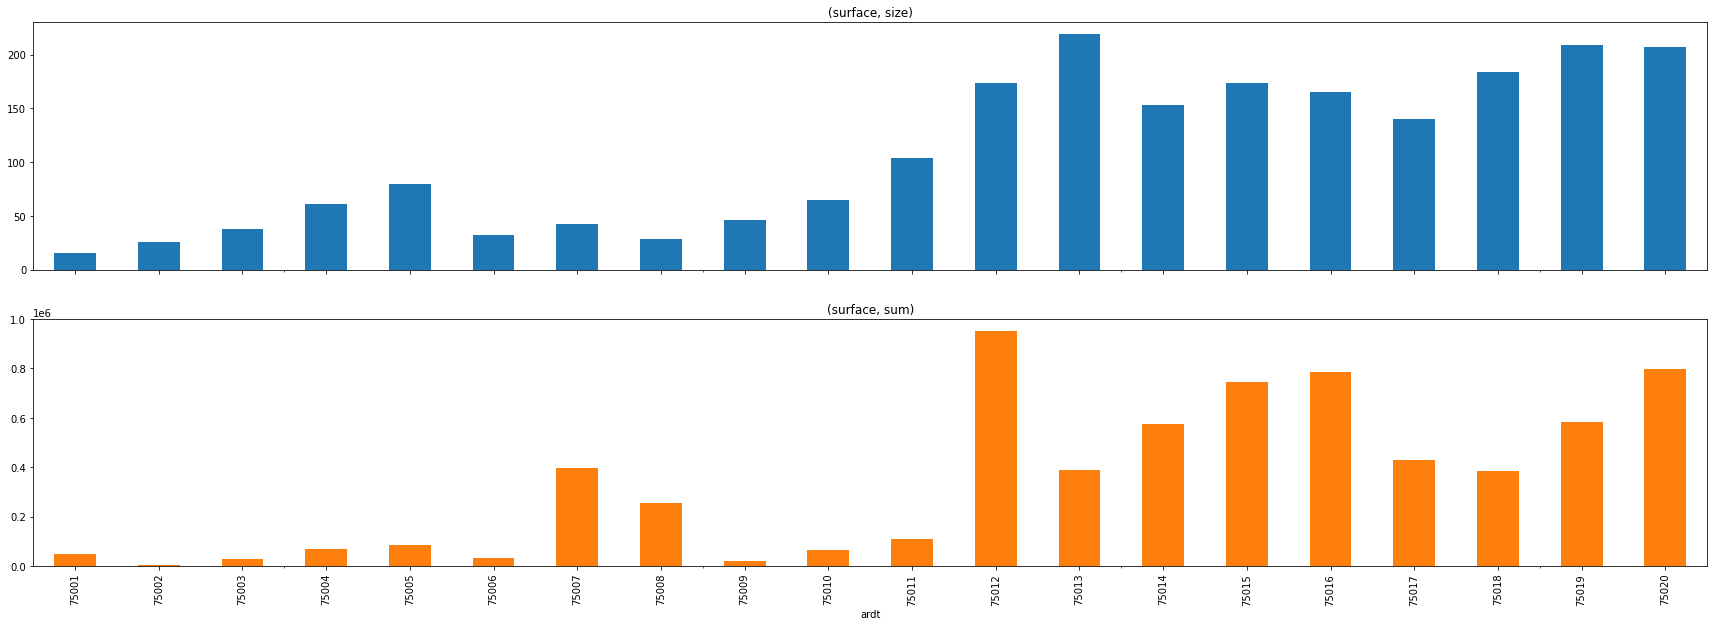

In [ ]:
# Calculer la surface d'espaces verts par arrondissement et leur nombre
SurfaceNbEspacevertARDT = EspacevertsParis[["ardt","surface"]].groupby(["ardt"]).agg(['size', 'sum'])
SurfaceNbEspacevertARDT.head()


SurfaceNbEspacevertARDT.plot.bar(subplots=True, figsize=(30, 10), legend=False)


https://github.com/matplotlib/cheatsheets 

## Exercices autour des lieux de tournage

**URL des Données**

https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris

* Combien de tournage dans le jeu de données
* Combien de tournages de films
* Combien de tournages de films dans le 16eme arrondissement
* Combien de tournages de séries dans le 1er arrondissement
* Faire un graphique du nombre de tournages par année
* Faire un graphique du nombre de tournages par type
* Faire un graphique du nombre de tournages par arrondissement

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O tournages.csv https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 

--2022-02-11 14:47:15--  https://opendata.paris.fr/explore/dataset/lieux-de-tournage-a-paris/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘tournages.csv’

tournages.csv           [               <=>  ]   2.28M   428KB/s    in 5.5s    

2022-02-11 14:47:23 (428 KB/s) - ‘tournages.csv’ saved [2389303]



In [ ]:
#Importer CSV to dataframe

tournages = pd.read_csv("tournages.csv", sep=';')
tournages.head()

,id_lieu,annee_tournage,type_tournage,nom_tournage,nom_realisateur,nom_producteur,adresse_lieu,ardt_lieu,date_debut,date_fin,coord_x,coord_y,geo_shape,geo_point_2d
0,2018-1354,2018,Téléfilm,HUGUETTE,ANTOINE GARCEAU,MON VOISIN PRODUCTIONS,"14 quai de la seine, 75019 paris",75019.0,2018-11-06,2018-11-06,2.371499,48.885080,"{""coordinates"": [2.371499161092738, 48.8850804...","48.8850804769,2.37149916109"
1,2018-1359,2018,Téléfilm,Temps de Chien,Edouard DELUC,THE FILM TV,"200 rue du faubourg saint-denis, 75010 paris",75010.0,2018-10-30,2018-10-30,2.358481,48.881698,"{""coordinates"": [2.358480592599792, 48.8816977...","48.8816977998,2.3584805926"
2,2018-1362,2018,Long métrage,Notre dame,Valérie Donzelli,RECTANGLE PRODUCTIONS,"4 rue dulac, 75015 paris",75015.0,2018-11-06,2018-11-06,2.315213,48.843533,"{""coordinates"": [2.315212506088781, 48.8435330...","48.8435330229,2.31521250609"
3,2019-690,2019,Long métrage,TOUT SIMPLEMENT NOIR,JEAN PASCAL ZADI ET JOHN WAXXX,GAUMONT,"32 rue louis le grand, 75002 paris",75002.0,2019-06-12,2019-06-12,2.334345,48.870639,"{""coordinates"": [2.334345131004881, 48.8706387...","48.8706387799,2.334345131"
4,2019-698,2019,Long métrage,Madame Claude,Sylvie VERHEYDE,Les Compagnons du Cinéma,"2 rue du commandant schloesing, 75116 paris",75116.0,2019-06-17,2019-06-17,2.284989,48.861892,"{""coordinates"": [2.284988779195575, 48.8618919...","48.8618919916,2.2849887792"


,type_tournage
annee_tournage,
2016,2660
2017,1743
2018,1579
2019,1760
2020,1177


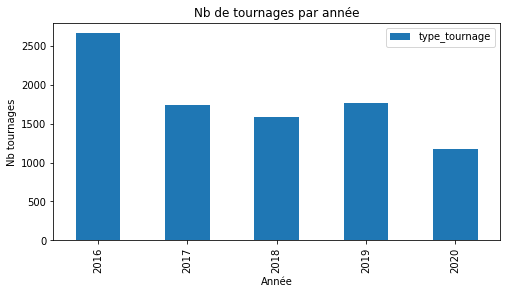

In [ ]:
#Compter le nombre de tournages par année

tournagesdate = tournages[["annee_tournage", "type_tournage"]].groupby("annee_tournage").count()
tournagesdate.plot(figsize =(8,4), kind="bar")
plt.title("Nb de tournages par année")
plt.xlabel("Année")
plt.ylabel("Nb tournages")
tournagesdate.head()

,type_tournage
ardt_lieu,
75001.0,497
75002.0,219
75003.0,164
75004.0,497
75005.0,469


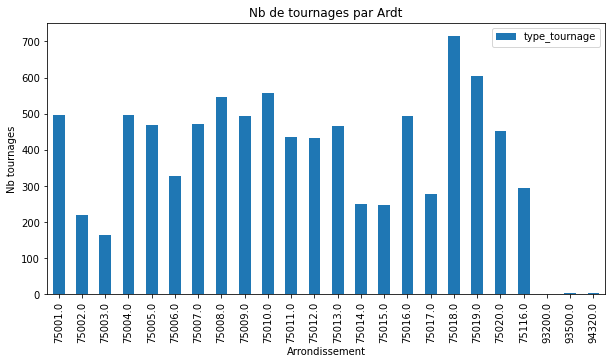

In [ ]:
#Compter le nombre de tournages par arrondissement

tournagesARDT = tournages[["ardt_lieu", "type_tournage"]].groupby("ardt_lieu").count()
tournagesARDT.plot(figsize =(10,5), kind="bar")
plt.title("Nb de tournages par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb tournages")
tournagesARDT.head()

,ardt_lieu
type_tournage,
Long métrage,5013
Série TV,3056
Série Web,380
Téléfilm,469


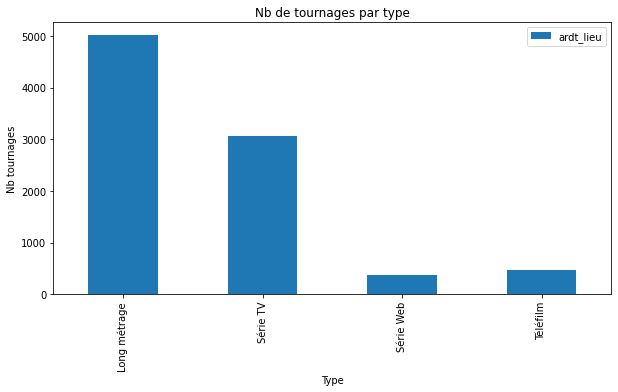

In [ ]:
#Compter le nombre de tournages par type

tournagesTYPE = tournages[["type_tournage", "ardt_lieu"]].groupby("type_tournage").count()
tournagesTYPE.plot(figsize =(10,5), kind="bar")
plt.title("Nb de tournages par type")
plt.xlabel("Type")
plt.ylabel("Nb tournages")
tournagesTYPE.head()

## Transformer un csv en geodataframe

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris

!wget -O toilettes.csv https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B


--2022-02-11 14:47:44--  https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘toilettes.csv’

toilettes.csv           [   <=>              ] 122.98K   242KB/s    in 0.5s    

2022-02-11 14:47:47 (242 KB/s) - ‘toilettes.csv’ saved [125932]



In [ ]:
#Importer CSV to dataframe

toilettes = pd.read_csv("toilettes.csv", sep=';')
toilettes.head()

,type,statut,adresse,arrondissement,horaire,acces_pmr,relais_bebe,url_fiche_equipement,geo_shape,geo_point_2d
0,SANISETTE,NaN,2 RUE JACQUES KELLNER,75017.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.328040763341667, 48.895835...","48.89583555740396,2.328040763341667"
1,SANISETTE,NaN,15 AVENUE DE LA PORTE DE CLIGNANCOURT,75018.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.343963695246802, 48.899194...","48.8991942601401,2.343963695246802"
2,SANISETTE,NaN,29 RUE MANIN,75019.0,24 h / 24,Oui,NaN,NaN,"{""coordinates"": [[2.3782622313212523, 48.87861...","48.87861935487687,2.3782622313212523"
3,SANISETTE,NaN,14 RUE MEYNADIER,75019.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.383450508308367, 48.883501...","48.883501985506584,2.383450508308367"
4,SANISETTE,NaN,face au 196 BOULEVARD DE LA VILLETTE,75019.0,24 h / 24,Oui,NaN,NaN,"{""coordinates"": [[2.370336342149233, 48.882213...","48.882213723425714,2.370336342149233"


In [ ]:
#Séparer la columne des coordonnées géographiques

toilettes[['Latitude','Longitude']] = toilettes['geo_point_2d'].str.split(',', expand=True)
toilettes.head()

,type,statut,adresse,arrondissement,horaire,acces_pmr,relais_bebe,url_fiche_equipement,geo_shape,geo_point_2d,Latitude,Longitude
0,SANISETTE,NaN,2 RUE JACQUES KELLNER,75017.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.328040763341667, 48.895835...","48.89583555740396,2.328040763341667",48.89583555740396,2.328040763341667
1,SANISETTE,NaN,15 AVENUE DE LA PORTE DE CLIGNANCOURT,75018.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.343963695246802, 48.899194...","48.8991942601401,2.343963695246802",48.8991942601401,2.343963695246802
2,SANISETTE,NaN,29 RUE MANIN,75019.0,24 h / 24,Oui,NaN,NaN,"{""coordinates"": [[2.3782622313212523, 48.87861...","48.87861935487687,2.3782622313212523",48.87861935487687,2.3782622313212523
3,SANISETTE,NaN,14 RUE MEYNADIER,75019.0,6 h - 22 h,Oui,NaN,NaN,"{""coordinates"": [[2.383450508308367, 48.883501...","48.883501985506584,2.383450508308367",48.883501985506584,2.383450508308367
4,SANISETTE,NaN,face au 196 BOULEVARD DE LA VILLETTE,75019.0,24 h / 24,Oui,NaN,NaN,"{""coordinates"": [[2.370336342149233, 48.882213...","48.882213723425714,2.370336342149233",48.882213723425714,2.370336342149233


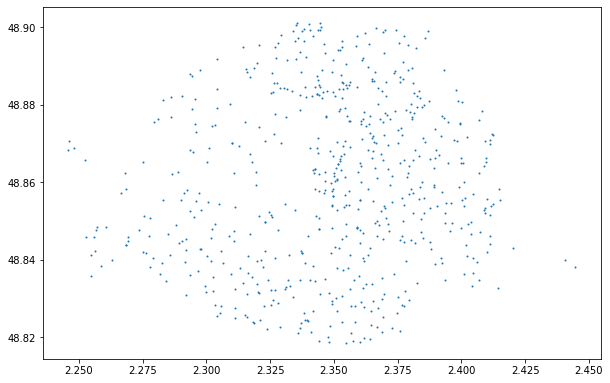

In [ ]:
#Dataframe to GeoDataframe

toilettes = gpd.GeoDataFrame(toilettes, crs = 'epsg:4326', geometry=gpd.points_from_xy(toilettes.Longitude, toilettes.Latitude))
toilettes.plot(figsize=(10,12), markersize=1)

## Exercices autour du jeu de données des arbres



URL : https://opendata.paris.fr/explore/dataset/les-arbres

* Importer le dataset des arbres  
* Compter le nombre d'abres
* Restructurer le jeu de données (sélection de variables et renommage) > "idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "geo_point_2d"
* Proposer une visualisation du nb d'arbres par arrondissement
* Proposer une visualisation du nb d'arbres par domanialité
* Proposer une visualisation de la hauteur moyenne par type
* Proposer une visualisation de la hauteur moyenne par arrondissement
* Créer un géodataframe 
* Faire une carte avec uniquement les chênes, les erables et les frênes



In [ ]:
#Importer CSV to dataframe

arbres = pd.read_csv("arbres.csv", sep=';')
arbres.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,236865,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,RUE BERNARD DIMEY,000202005,Cerisier à grappes,Prunus,padus,''Tiefurt'',20,5,NaN,NON,"48.8970800881,2.33129044307"
1,214956,Arbre,Alignement,PARIS 13E ARRDT,NaN,NaN,AVENUE DE FRANCE,000501016,Arbre aux quarante écus,Ginkgo,biloba,NaN,45,8,JA,NON,"48.8301994313,2.37697518465"
2,214399,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,RUE LEBLANC,000602011,Poirier à fleurs,Pyrus,calleryana,''Chanticleer'',30,7,A,NON,"48.8365129867,2.27971919875"
3,232195,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD PEREIRE,001002003,Sophora,Sophora,japonica,NaN,184,17,M,NON,"48.8808487215,2.28936083674"
4,239639,Arbre,Alignement,PARIS 10E ARRDT,20,NaN,BOULEVARD DE MAGENTA,000202015,Orme,Ulmus,NaN,''Sapporo Autumn Gold'' RESISTA,63,12,A,NON,"48.8699906691,2.36182643939"


In [ ]:
#Compter le nombre d'arbres

arbres['domanialite'].size

204909

In [ ]:
#Réorganiser la table

arbresok = arbres[["idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "circonferenceencm", "remarquable", "geo_point_2d"]]
arbresok.head()

,idbase,domanialite,arrondissement,libellefrancais,hauteurenm,circonferenceencm,remarquable,geo_point_2d
0,236865,Alignement,PARIS 18E ARRDT,Cerisier à grappes,5,20,NON,"48.8970800881,2.33129044307"
1,214956,Alignement,PARIS 13E ARRDT,Arbre aux quarante écus,8,45,NON,"48.8301994313,2.37697518465"
2,214399,Alignement,PARIS 15E ARRDT,Poirier à fleurs,7,30,NON,"48.8365129867,2.27971919875"
3,232195,Alignement,PARIS 17E ARRDT,Sophora,17,184,NON,"48.8808487215,2.28936083674"
4,239639,Alignement,PARIS 10E ARRDT,Orme,12,63,NON,"48.8699906691,2.36182643939"


In [ ]:
# Renommer les champs

arbresok.rename(columns={'idbase': 'id','libellefrancais': 'type','hauteurenm': 'hauteur', 'circonferenceencm': 'circonference'}, inplace=True)
arbresok.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,domanialite,arrondissement,type,hauteur,circonference,remarquable,geo_point_2d
0,236865,Alignement,PARIS 18E ARRDT,Cerisier à grappes,5,20,NON,"48.8970800881,2.33129044307"
1,214956,Alignement,PARIS 13E ARRDT,Arbre aux quarante écus,8,45,NON,"48.8301994313,2.37697518465"
2,214399,Alignement,PARIS 15E ARRDT,Poirier à fleurs,7,30,NON,"48.8365129867,2.27971919875"
3,232195,Alignement,PARIS 17E ARRDT,Sophora,17,184,NON,"48.8808487215,2.28936083674"
4,239639,Alignement,PARIS 10E ARRDT,Orme,12,63,NON,"48.8699906691,2.36182643939"


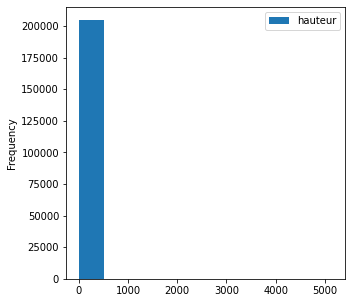

In [ ]:
# Faire un histogramme de distribution des hauteurs des arbres

arbresok.plot.hist(y='hauteur', figsize=(5, 5))

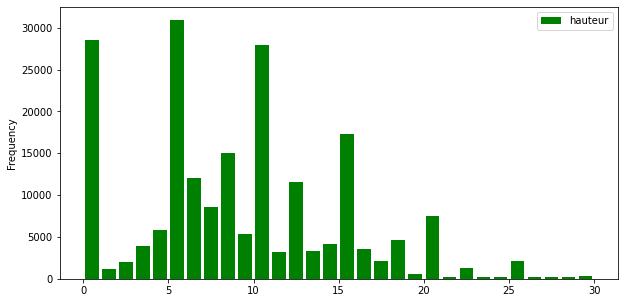

In [ ]:
#Nettoyer le jeu de données des valeurs abérantes (moins de 30m)

arbresclean = arbresok[(arbresok["hauteur"] <=30)]
arbresclean.plot.hist(y='hauteur', figsize=(10, 5), bins= 30, color = 'green', rwidth=0.8)

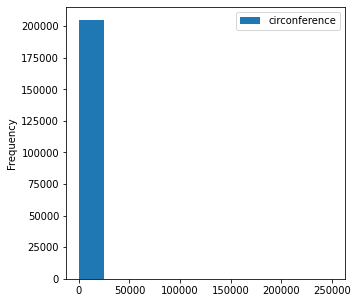

In [ ]:
# Faire un histogramme de distribution des circonférences des arbres

arbresok.plot.hist(y='circonference', figsize=(5, 5))

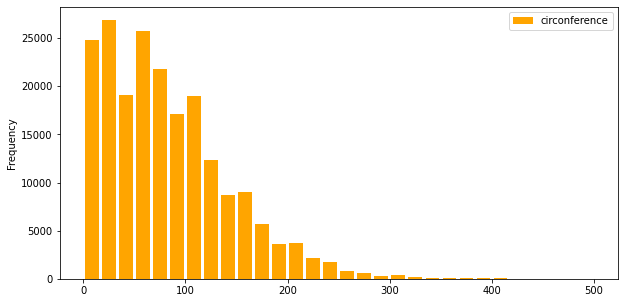

In [ ]:
#Nettoyer le jeu de données des valeurs abérantes (moins de 5m)

arbresclean = arbresclean[(arbresclean["circonference"] <=500)]
arbresclean.plot.hist(y='circonference', figsize=(10, 5), bins= 30, color = 'orange', rwidth=0.8)

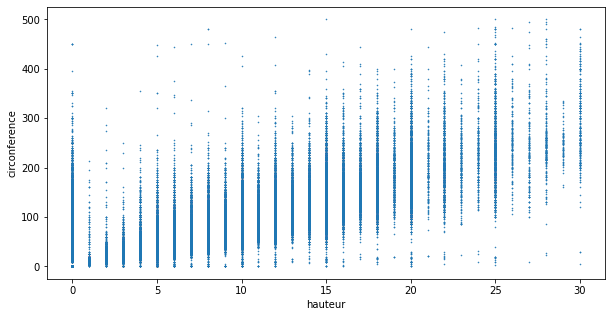

In [ ]:
# Faire un scatterplot qui met en relation la hauteur et la circonférence des arbres

arbresclean.plot.scatter(x='hauteur', y ="circonference", figsize=(10, 5), s=0.3)

,id
arrondissement,
BOIS DE BOULOGNE,4117
BOIS DE VINCENNES,11835
HAUTS-DE-SEINE,5417
PARIS 10E ARRDT,3408
PARIS 11E ARRDT,5908


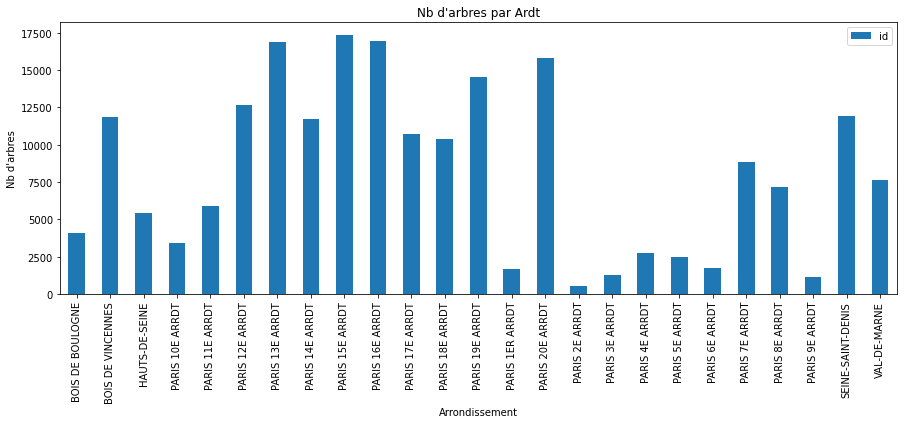

In [ ]:
#Compter le nombre d'arbres par arrondissement

ArbresARDT = arbresok[["arrondissement", "id"]].groupby("arrondissement").count()
ArbresARDT.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb d'arbres")
ArbresARDT.head()


,id
domanialite,
Alignement,106155
CIMETIERE,32161
DAC,27
DASCO,7204
DASES,11


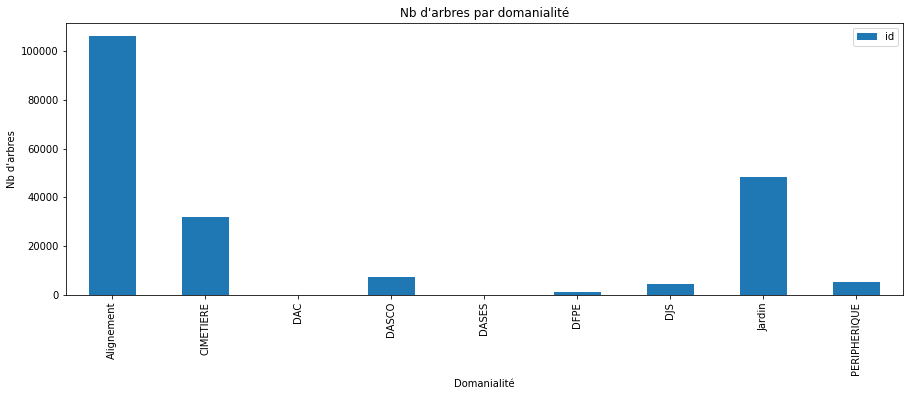

In [ ]:
#Compter le nombre d'arbres par type de domanialité

ArbresDomanialite = arbresok[["domanialite", "id"]].groupby("domanialite").count()
ArbresDomanialite.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par domanialité")
plt.xlabel("Domanialité")
plt.ylabel("Nb d'arbres")
ArbresDomanialite.head()

,hauteur
type,
Abelia,5.500000
Abricotier,2.379310
Abricotier fruit,2.000000
Ailante,8.520373
Alangium,2.333333


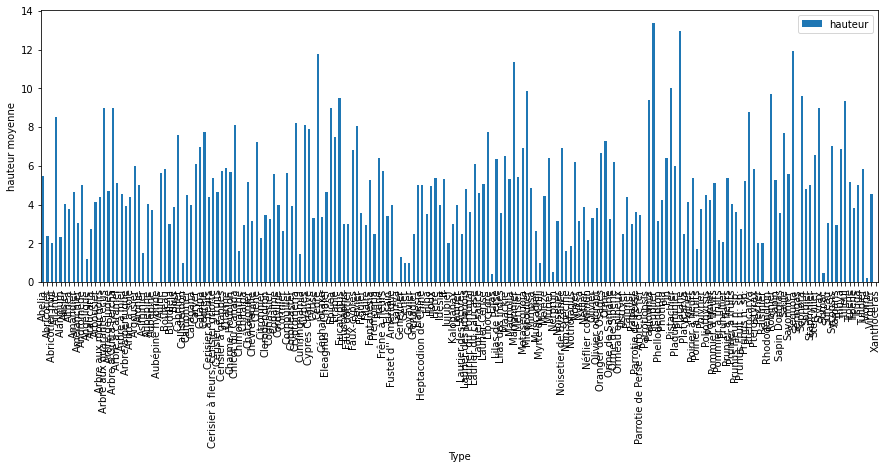

In [ ]:
# Calculer la hauteur moyenne des arbres par type d'arbres

HauteurType = arbresok[["type", "hauteur"]].groupby("type").mean()
HauteurType.plot(figsize =(15,5), kind="bar")
plt.xlabel("Type")
plt.ylabel("hauteur moyenne")
HauteurType.head()

,hauteur
arrondissement,
BOIS DE BOULOGNE,13.334224
BOIS DE VINCENNES,9.467596
HAUTS-DE-SEINE,2.106147
PARIS 10E ARRDT,10.675176
PARIS 11E ARRDT,10.854096


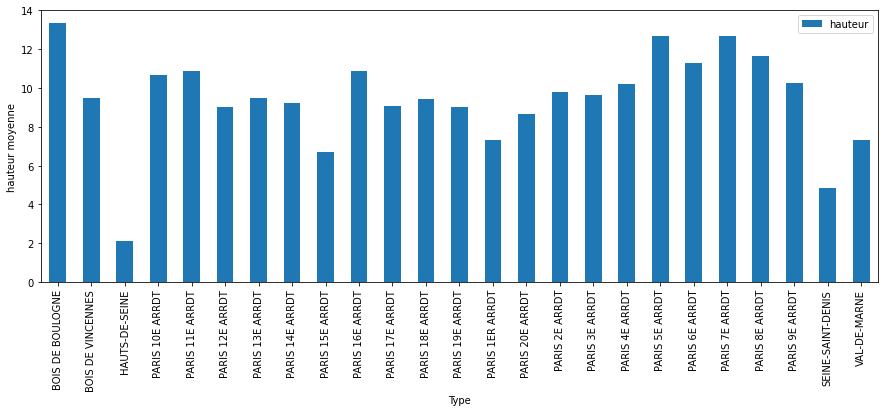

In [ ]:
# Calculer la hauteur moyenne des arbres par ardt

HauteurType = arbresok[["arrondissement", "hauteur"]].groupby("arrondissement").mean()
HauteurType.plot(figsize =(15,5), kind="bar")
plt.xlabel("Type")
plt.ylabel("hauteur moyenne")
HauteurType.head()

In [ ]:
#Séparer la colonne des coordonnées géographiques

arbresok[['Latitude','Longitude']] = arbresok['geo_point_2d'].str.split(',', expand=True)
arbresok.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,domanialite,arrondissement,type,hauteur,circonference,remarquable,geo_point_2d,Latitude,Longitude
0,236865,Alignement,PARIS 18E ARRDT,Cerisier à grappes,5,20,NON,"48.8970800881,2.33129044307",48.8970800881,2.33129044307
1,214956,Alignement,PARIS 13E ARRDT,Arbre aux quarante écus,8,45,NON,"48.8301994313,2.37697518465",48.8301994313,2.37697518465
2,214399,Alignement,PARIS 15E ARRDT,Poirier à fleurs,7,30,NON,"48.8365129867,2.27971919875",48.8365129867,2.27971919875
3,232195,Alignement,PARIS 17E ARRDT,Sophora,17,184,NON,"48.8808487215,2.28936083674",48.8808487215,2.28936083674
4,239639,Alignement,PARIS 10E ARRDT,Orme,12,63,NON,"48.8699906691,2.36182643939",48.8699906691,2.36182643939


In [ ]:
# Ne garder que les chênes, les Erables et les  Frênes

Arbresselect = arbresok[(arbresok["type"] == 'Chêne') | (arbresok["type"] == 'Erable')| (arbresok["type"] == 'Frêne')]
Arbresselect.head()

,id,domanialite,arrondissement,type,hauteur,circonference,remarquable,geo_point_2d,Latitude,Longitude
11,250957,Alignement,PARIS 15E ARRDT,Frêne,6,25,NON,"48.840880042,2.28718855814",48.840880042,2.28718855814
12,2021352,Alignement,PARIS 20E ARRDT,Erable,5,20,NON,"48.869346584,2.41080601218",48.869346584,2.41080601218
13,166134,CIMETIERE,SEINE-SAINT-DENIS,Chêne,5,20,NON,"48.906225365,2.41871937323",48.906225365,2.41871937323
23,242954,Alignement,PARIS 19E ARRDT,Erable,5,50,NON,"48.8908881658,2.37448064504",48.8908881658,2.37448064504
25,2015120,Jardin,BOIS DE VINCENNES,Erable,0,0,NON,"48.838198172,2.44767969144",48.838198172,2.44767969144


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff96f9560d0>],
      dtype=object)

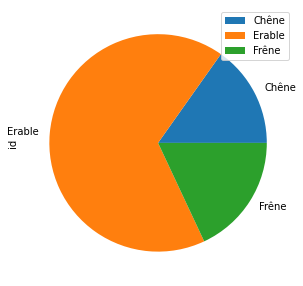

In [ ]:
# Visualisation (pie)

les3arbres = Arbresselect[["type", "id"]].groupby("type").count()
les3arbres.plot.pie(y='id', figsize=(5, 5), subplots=True)

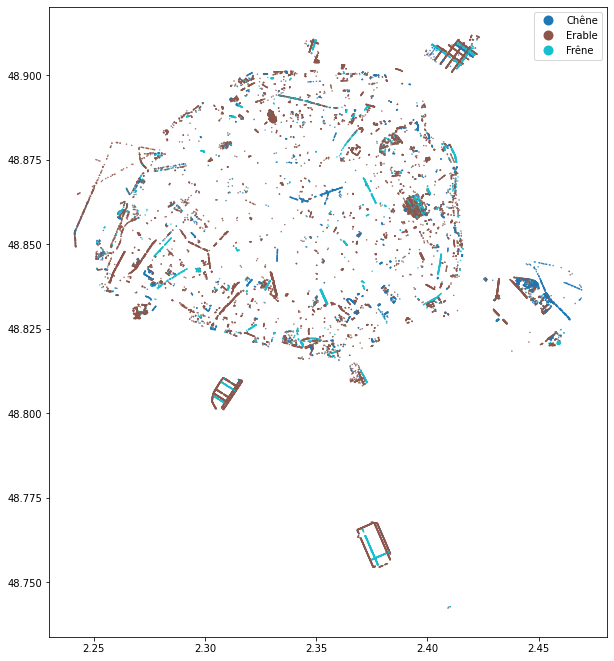

In [ ]:
#Dataframe to GeoDataframe

Arbresselect = gpd.GeoDataFrame(Arbresselect, crs = 'epsg:4326', geometry=gpd.points_from_xy(Arbresselect.Longitude, Arbresselect.Latitude))
Arbresselect.plot(figsize=(10,12), markersize=0.2, column = "type", legend = 'true')

## Exercice autour des aménagements cyclables de Nantes

URL du dataset : https://data.nantesmetropole.fr/explore/dataset/244400404_amenagements-cyclables-nantes-metropole/table/?disjunctive.type&disjunctive.sens&disjunctive.commune&disjunctive.utilisation




*   Importer le jeu de données
*   Faire un graphique de répartition en fonction du type d'aménagement
*   Faire un graphique de répartition en fonction de la longueur d'aménagement par commune


